In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("attributes_report.csv")


data.head()

,company,company_type,subscribed_after_free_trial
0,346782,uk_limited_company,False
1,346783,uk_limited_company,False
2,346784,uk_limited_company,True
3,346785,uk_limited_company,False
4,346786,uk_limited_company,False


In [2]:
subscribed = data['subscribed_after_free_trial'].value_counts()
subscribed

False    789
True     161
Name: subscribed_after_free_trial, dtype: int64

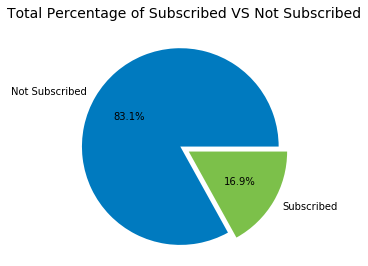

In [3]:
explode = (0, 0.1)
plt.pie(subscribed, labels = ["Not Subscribed", "Subscribed"], autopct='%1.1f%%', explode=explode, colors=('#007abfff', '#7cc04a'))
plt.title("Total Percentage of Subscribed VS Not Subscribed", pad='20', fontsize='14')
plt.axis('equal')
plt.show()

In [4]:
data[data["company_type"] == "uk_limited_company"]['subscribed_after_free_trial'].value_counts()

False    397
True     103
Name: subscribed_after_free_trial, dtype: int64

In [5]:
data[data["company_type"] == "uk_sole_trader"]['subscribed_after_free_trial'].value_counts()

False    296
True      54
Name: subscribed_after_free_trial, dtype: int64

In [6]:
data[data["company_type"] == "universal_company"]['subscribed_after_free_trial'].value_counts()

False    96
True      4
Name: subscribed_after_free_trial, dtype: int64

In [7]:
Totalnumberofcomapnies = 789+161
Totalnumberoftruesuklimited = 103
Totalnumberoffalseuklimited = 397
Totaluklimited =103+397
Totalnumberoftruesuksole= 54
Totalnumberoffalseuksole = 296
Totaluksole = 54 + 296
Totalnumberoftruesuniversal = 4
Totalnumberoffalseuniversal = 96
Totaluniversal =96+4
company_labels = ['UK Limited', 'UK Sole Trader', 'Universal' ]
company_labels_tf = ['UK Limited True','UK Limited False', 'UK Sole Trader True', 'UK Sole Trader False', 'Universal True', 'Universal False' ]

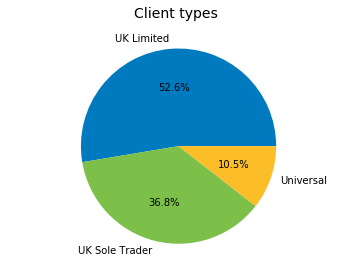

In [8]:
plt.pie([Totaluklimited, Totaluksole, Totaluniversal], labels = company_labels, autopct='%1.1f%%', colors=('#007abfff', '#7cc04a', '#FBBE28'))
plt.title("Client types ", pad='20', fontsize='14')
plt.axis('equal')
plt.show()

In [9]:
true_false_values = [Totalnumberoftruesuklimited, Totalnumberoffalseuklimited, Totalnumberoftruesuksole, Totalnumberoffalseuksole, Totalnumberoftruesuniversal, Totalnumberoffalseuniversal]

The above diagram is a pie chart which shows the breakdown of the types of companies which have tried the free agent model. From the above it is clearly visible that Free Agent is a company that is UK based company and has mostly UK based companies who are interested in them.

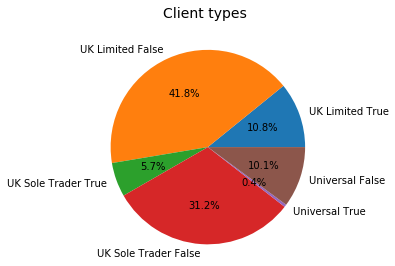

In [10]:
plt.pie(true_false_values, labels = company_labels_tf, autopct='%1.1f%%')
plt.title("Client types ", pad='20', fontsize='14')
plt.axis('equal')
plt.show()

In [11]:
CompanyType = ["Company Type", "True", "False"]
UK_L = ["UK_Limited", "   " + str(true_false_values[0]),"  " + str(true_false_values[1])]
UK_S = ["UK_Sole", "       " + str(true_false_values[2]), "  " + str(true_false_values[3])]
Uni = ["Universal", "      " + str(true_false_values[4]), "   " + str(true_false_values[5])]
print(CompanyType)
print(UK_L)
print(UK_S)
print(Uni)

['Company Type', 'True', 'False']
['UK_Limited', '   103', '  397']
['UK_Sole', '       54', '  296']
['Universal', '      4', '   96']


The above pie chart is an extension from the pie chart above. This one shows the proportions of companies from each company type that have and have not subscriped to the application. There are a total of 950 companies, from which 789 companies have opted to not subscribe to the application after the 7 day free trial and 161 companies have opted to subscribe after the seven day trial period. 

500 uk limited companies chose the seven day free trial, 397 of the companies opted not to subscribe to the model and 103 did. This implies that 20.6% of the companies opted for the subscription. 

350 uk sole trader companies chose the seven day trial period, 296 choose not to subscribe while 54 did. This meant 15,4% of the companies continues with the application after the free trial. 

100 universal companies chose the seven day trial, 96 of them opted not to subscribe to the model and 4 of them did. Leaving a 4% success rate. 

Even though overall the companies success rate is 16.9%, the breakdown of the companies show that the the greatest success rate comes from uk limited then uk sole trader. It is evident that universal companies do not use the application as much. There could be many reasons as to why this is the case, perhaps the application does not suit universal's company finanical structure etc. But what this breakdown also shows is that free agent is has greated income from local companies; therefore, should focus on targeting them in their marketing stratigies. 

Now the next step would be too look at the log entry to see if there is any pattern which customers follow which depicts whether they subscribe or not.

In [12]:
numeric_values = []
with open("engagement_report.log", "r") as f:
        for line in f:
            numeric_values.append(int(line[25]))
total_usage = []
x = 0

np_numeric_values = np.array(numeric_values)
len(np_numeric_values)
while x < len(np_numeric_values):
    values  = np_numeric_values[x:x+7]
    total_usage.append(np.sum(values))
    x = x + 7
total_usage[0:15]

[3, 0, 7, 0, 0, 1, 0, 0, 0, 2, 7, 0, 1, 2, 11]

In [13]:
data["Number of Times Used in a Week"] = total_usage
data.head()

,company,company_type,subscribed_after_free_trial,Number of Times Used in a Week
0,346782,uk_limited_company,False,3
1,346783,uk_limited_company,False,0
2,346784,uk_limited_company,True,7
3,346785,uk_limited_company,False,0
4,346786,uk_limited_company,False,0


In [14]:
log_ins = data[["subscribed_after_free_trial", "Number of Times Used in a Week"]]
log_ins.head()

,subscribed_after_free_trial,Number of Times Used in a Week
0,False,3
1,False,0
2,True,7
3,False,0
4,False,0


In [15]:
log_in_dict_false = {}
log_in_dict_true = {}
for x in range(len(log_ins)):
    if log_ins.iloc[x,0] == False:
        if log_ins.iloc[x,1] in log_in_dict_false.keys():
            log_in_dict_false[log_ins.iloc[x,1]] +=1
        else:
            log_in_dict_false[log_ins.iloc[x,1]] =1
            
    else:
        if log_ins.iloc[x,1] in log_in_dict_true.keys():
            log_in_dict_true[log_ins.iloc[x,1]] +=1
        else:
            log_in_dict_true[log_ins.iloc[x,1]] =1
log_in_dict_false

{0: 198, 1: 268, 2: 196, 3: 74, 4: 36, 5: 11, 6: 6}

In [16]:
log_in_dict_true

{3: 2,
 4: 4,
 5: 14,
 6: 16,
 7: 32,
 8: 16,
 9: 20,
 10: 18,
 11: 21,
 12: 8,
 13: 6,
 14: 1,
 15: 2,
 18: 1}

In [17]:
true_y_values = np.zeros(19)
for x in log_in_dict_true.keys():
    true_y_values[x] = log_in_dict_true[x]
true_y_values



array([ 0.,  0.,  0.,  2.,  4., 14., 16., 32., 16., 20., 18., 21.,  8.,
        6.,  1.,  2.,  0.,  0.,  1.])

In [18]:
false_y_values = np.zeros(19)
for x in log_in_dict_false.keys():
    false_y_values[x] = log_in_dict_false[x]
false_y_values
x_values = np.arange(0,19)
x_values

total_values = false_y_values + true_y_values
total_values
percentages = []
for x in range(len(true_y_values)):
    if total_values[x] !=0:
        percentages.append(str(int((true_y_values[x]/total_values[x])*100))+'%')
    else:
        percentages.append(str(0)+'%')

percentages

['0%',
 '0%',
 '0%',
 '2%',
 '10%',
 '56%',
 '72%',
 '100%',
 '100%',
 '100%',
 '100%',
 '100%',
 '100%',
 '100%',
 '100%',
 '100%',
 '0%',
 '0%',
 '100%']

In [32]:
data["Number of Times Used in a Week"].describe()

count    950.000000
mean       2.614737
std        3.077330
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       18.000000
Name: Number of Times Used in a Week, dtype: float64

In [37]:
data[data["Yes or no"] == 1]["Number of Times Used in a Week"].describe()

count    161.000000
mean       8.490683
std        2.610359
min        3.000000
25%        7.000000
50%        8.000000
75%       10.000000
max       18.000000
Name: Number of Times Used in a Week, dtype: float64

Assumption : The dataset follows a gaussian distribution. 

I am using hypothesis testing to check whether the number of log ins influences the decision of the consumer to subscribe or not to the application after the seven day trial period. On average, the number of times a consumer has logged in given they are going to subscribe is about 8.5 times with a standard deviation of about 2.6. In general the number of times logged in a wekk is about 2.6 with a standard deviation of 3. 

Hypothesis Null - The number of log ins does not make an affect to whether or not a consumer suscribes to the model.
Hypothesis alternative - The number of log ins decide whether or not a consumer subscribes to the application.

In [39]:
(8.490683 - 2.614737)/3.077330

1.9094299278920366

Z score is 1.91, which makes my p value (looking up from the z score table) 0.0281.  Because this value is less than 0.05, we can reject the null hypothesis.

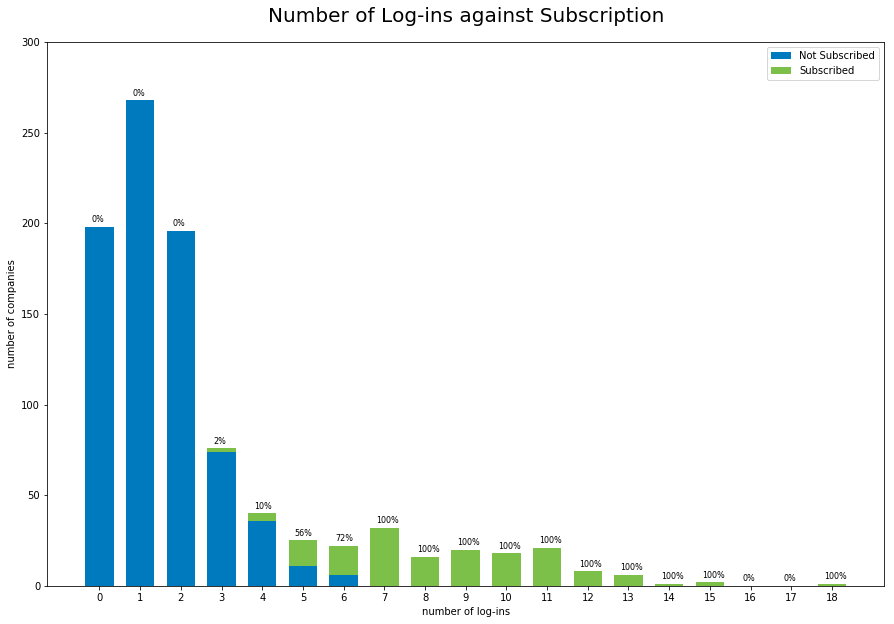

In [19]:

ind = x_values    # the x locations for the groups
width = 0.7    # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(15,10))

p1 = plt.bar(ind, false_y_values, width, color='#007abfff')
p2 = plt.bar(ind, true_y_values, width,
             bottom=false_y_values, color='#7cc04a')

plt.ylabel('number of companies')
plt.title('Number of Log-ins against Subscription', pad='20', fontsize='20')
plt.ylim(0,300)
plt.xticks(x_values)
plt.xlabel('number of log-ins')

plt.legend((p1[0], p2[0]), ('Not Subscribed', 'Subscribed'))
i = -0.2
for x in range(len(percentages)):
    plt.annotate(percentages[x], (i, total_values[x]+2.5), fontsize = '8')
    i += 1

plt.show()

The above is a bar graph which shows the number of logins on the x-axis and the number of companies that had that many logins. Above the bars are the percentages of companies that subscribed to the model after logging in that many times during the week. From the graph above, it shows that if a company logs in 7 times or more during the seven day trial period (at least once a day), they are gauranteed to subscribe to the applicaiton.   To add there is more than a 50% chance of subscription if the customers logs in 5 or 6 times during the week. 

Side note: 
From the analysis above, I would suggest that if a company has logged in 4/5 times by the 6th day and they log in on the seventh day, I think it would be advisable if free agent decided to give a discount ith the intension of bring the customer in because from the evidence above it shows when people login 5 times they are on the edge, hence this would be one way to get more customers. 

Now I would like to use machine learning to predict whether a customer chooses to subscribe to the application or not.

In [20]:
data.head()

,company,company_type,subscribed_after_free_trial,Number of Times Used in a Week
0,346782,uk_limited_company,False,3
1,346783,uk_limited_company,False,0
2,346784,uk_limited_company,True,7
3,346785,uk_limited_company,False,0
4,346786,uk_limited_company,False,0


In [21]:
lists = []
for x in data["subscribed_after_free_trial"]:
    if x:
        lists.append(1)
    else:
        lists.append(0)
data["Yes or no"] = lists

lists = []
for x in data["company_type"]:
    if x == "uk_limited_company":
        lists.append(0)
    elif x == "uk_sole_trader":
        lists.append(1)
    else:
        lists.append(2)
data["company"] = lists
data.head()

,company,company_type,subscribed_after_free_trial,Number of Times Used in a Week,Yes or no
0,0,uk_limited_company,False,3,0
1,0,uk_limited_company,False,0,0
2,0,uk_limited_company,True,7,1
3,0,uk_limited_company,False,0,0
4,0,uk_limited_company,False,0,0


Idea is to make the values numerical, so that can work with machine learning models - one hot encoding

In [22]:
values = data[["company", "Number of Times Used in a Week"]]
answer = data["Yes or no"]

In [23]:
values.head()

,company,Number of Times Used in a Week
0,0,3
1,0,0
2,0,7
3,0,0
4,0,0


In [24]:
answer.head()

0    0
1    0
2    1
3    0
4    0
Name: Yes or no, dtype: int64

In [25]:
from sklearn.model_selection import  cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(clf, values, answer, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.97905759 0.97368421 0.97894737 0.96315789 0.96296296]
Average 5-Fold CV Score: 0.9715620056540419


The reason why I have chosen a decision tree is because intuitively anlayzing the data it is clear that the data can be seperated based on the company type, then based on the number of times the company logged in during the seven day trial period, the analysis shows that there is a pretty clear answer in terms of what is the most probable answer; hence, I thought that a decision tree would be a very good model, and based on the accurage above, the average accuracy is about 97% which is a pretty good measure. 

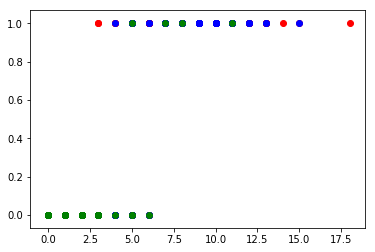

In [26]:
#values[values["company"] == 0]["Number of Times Used in a Week"].shape
#answer[values["company"] == 0].shape
plt.scatter(list(values[values["company"] == 0]["Number of Times Used in a Week"]), list(answer[values["company"] == 0]), c = "red")
plt.scatter(list(values[values["company"] == 1]["Number of Times Used in a Week"]), list(answer[values["company"] == 1]), c = "blue")
plt.scatter(list(values[values["company"] == 2]["Number of Times Used in a Week"]), list(answer[values["company"] == 2]), c = "green")


Having a look at the graph above, one thing that can be noted is that there is quite an overlapping between the data points; this is one reason why I am choosing to use the machines learning technique svm to predict whether a company would subscribe to the application.

In [27]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
cv_scores = cross_val_score(clf, values, answer, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.98429319 0.97368421 0.97368421 0.96842105 0.96296296]
Average 5-Fold CV Score: 0.9726091260728902


As we can see from the above, the svm also is able to predict accurately as well; its average shows that it performs just slighlty better than the decision tree.

Another model that I would like to attempt, is a Logistic Regression. The reason being is because it behaves like a linear classifier, and this is one of those situations where it would be used well because the model needs to classify whether or not a company would subscribe or not.

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
cv_scores = cross_val_score(clf, values, answer, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.98429319 0.97368421 0.97894737 0.97368421 0.96296296]
Average 5-Fold CV Score: 0.974714389230785


As we can see from the results above, the Logisitic Regression model has performed the best out of all the models. Its accuracy is 0.02% better than the other two; however, one thing to notice is that all of the models have produced an accuracy of 97%, which is very good.

In [29]:
def companytranslation(x):
    if x == 0:
        return "UK Limited"
    elif x == 1:
        return "UK Sole"
    else:
        return "Universal"
def resulttranslation(x):
    if x == 0:
        return " not subscribe "
    elif x == 1:
        return " subscribe"
clf.fit(values, answer)
    
lists = []
lists.append(("Company", "# of Logins", "Result"))
for x in range(3):
    for y in range(1,10):
        lists.append((companytranslation(x), str(y), resulttranslation(clf.predict([[x,y]])[0])))
        #rint(companytranslation(x) + " logs-in " + str(y) +  " during the seven day trial period and the they will " +  resulttranslation(clf.predict([[x,y]])[0]))
        #print(companytranslation(x) + " logs-in " + str(y) + " during the seven day trial period and the they will " + resulttranslation(clf.predict([[x,y]])[0])
lists    

[('Company', '# of Logins', 'Result'),
 ('UK Limited', '1', ' not subscribe '),
 ('UK Limited', '2', ' not subscribe '),
 ('UK Limited', '3', ' not subscribe '),
 ('UK Limited', '4', ' not subscribe '),
 ('UK Limited', '5', ' subscribe'),
 ('UK Limited', '6', ' subscribe'),
 ('UK Limited', '7', ' subscribe'),
 ('UK Limited', '8', ' subscribe'),
 ('UK Limited', '9', ' subscribe'),
 ('UK Sole', '1', ' not subscribe '),
 ('UK Sole', '2', ' not subscribe '),
 ('UK Sole', '3', ' not subscribe '),
 ('UK Sole', '4', ' not subscribe '),
 ('UK Sole', '5', ' not subscribe '),
 ('UK Sole', '6', ' subscribe'),
 ('UK Sole', '7', ' subscribe'),
 ('UK Sole', '8', ' subscribe'),
 ('UK Sole', '9', ' subscribe'),
 ('Universal', '1', ' not subscribe '),
 ('Universal', '2', ' not subscribe '),
 ('Universal', '3', ' not subscribe '),
 ('Universal', '4', ' not subscribe '),
 ('Universal', '5', ' not subscribe '),
 ('Universal', '6', ' not subscribe '),
 ('Universal', '7', ' subscribe'),
 ('Universal', '8', 

The above predictions (which are from the Logistic Regression) confirm the results shown in the graph "Number of Log-ins against Subscription", cause for both UK based companies if they both log in at least 6 times during the seven day trial period, then they are certain to subscribe to the model. UK Limited companies are more likely to subscribe logging in 5 times or more; whereas UK Sole companies are more likely to subscribe when they log in 6 times or more. 

Universal companies need to log in at least 7 times during the free trial period for them to subscribe according to the prediction model. From the above, free agent should definetely focus on UK base comapnies because that is where success is more guaranteed and it seems that their application suits UK based companies. To add, the application should have a system where they are able to track how many times a company has logged in before the last day of the seven day trial period and if they have logged in 3/4 times and they log in again, they should be given an inital discount to try and get them to subscribe. This would increases their revenue and customer base. 